# Cleaning Data in Python

## 1. Common data problems

Answer

Numeric data types: Salary earned monthly, Number of points on customer loyalty card, Number of items bought in a basket
    
Text: First name, Shipping address of a customer, City of residence

Date: Order date of a product, Birthdays of clients

In [1]:
import pandas as pd

ride_sharing = pd.read_csv('ride_sharing_new.csv')
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [2]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


Answer: The user_type column has an finite set of possible values that represent groupings of data, it should be converted to category.

In [3]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype("category")

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dty

In [4]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


In [ ]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

In [ ]:
# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

Answer: loans.duplicated(). Because the default method returns both complete and incomplete duplicates.

In [ ]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset=['ride_id'], keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

## 2. Text and categorical data problems

Answer:
    
Membership Constraint: A day of week column with the value Suntermonday, A has_loan column with the value 12, A month column with the value 14, A GPA column containing a Z- grade

Other Constraint: A revenue column represented as a string, An age column with calues above 130, A birthday column with values in the future.

In [22]:
airlines = pd.read_csv('airlines_final.csv')
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [23]:
import numpy as np

categories = pd.DataFrame({
    'cleanliness': ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
    'safety': ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
    'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
})

In [24]:
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



airlines.cleanliness

airlines.safety

airlines.satisfaction

Answer: cleanliness because it has an Unacceptable category.

In [29]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines.cleanliness).difference(categories.cleanliness)

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

Empty DataFrame
Columns: [Unnamed: 0, id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []


In [30]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

Empty DataFrame
Columns: [Unnamed: 0, id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []


In [27]:
# Print rows with consistent categories only
airlines[~cat_clean_rows]

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2804,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2473,2805,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2806,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2807,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


Answer:

White spaces and inconsistency: .str.upper(), .str.lower(), .str.strip()

Creating or remapping categories: pandas.cut(), pandas.qcut(), .replace()

In [28]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


Answer: Both 2 and 3 are correct.
    
2) The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped.
3) The dest_size column has only inconsistent values due to leading and trailing spaces.

In [32]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [36]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'])
print(airlines['dest_size'])

0                asia
1       canada/mexico
2             west us
3             west us
4             east us
            ...      
2472          east us
2473          west us
2474          east us
2475          west us
2476             asia
Name: dest_region, Length: 2477, dtype: object
0         Hub
1       Small
2         Hub
3         Hub
4         Hub
        ...  
2472      Hub
2473      Hub
2474      Hub
2475    Small
2476    Large
Name: dest_size, Length: 2477, dtype: object


In [37]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines.wait_min, bins = label_ranges, labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday',
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

In [ ]:
# Store length of each row in survey_response column
resp_length = airlines.survey_response.str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey.survey_response.str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

## 3. Advanced data problems

Answer: Set them to NA and drop them.

In [42]:
banking = pd.read_csv('banking_dirty.csv')
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1
# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

In [47]:
# Print the header of account_opened
print(banking.account_opened.head())

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


Answer: The 21-14-17 entry is erroneous and leads to an error.

In [48]:
# Print the header of account_opened
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking.account_opened,
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object


In [49]:
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking.acct_year)

0   2018-02-09
1   2019-02-28
2   2018-04-25
3   2017-07-11
4   2018-05-14
Name: account_opened, dtype: datetime64[ns]
0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


Answer:
    
Cross field validation: Confirming the Age provided by users by cross checking their birthdays, Row wise operations such as .sum(axis = 1)

Not cross field validation: The use of the .astype() method, Making sure a subscription_date column has no values set in the future, Making sure that a revenue column is a numeric column

In [50]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking.inv_amount

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [56]:
import datetime as dt
banking['birth_date'] = pd.to_datetime(banking['birth_date'], errors='coerce')

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking.Age == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


Answer: Missing completely at random.

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


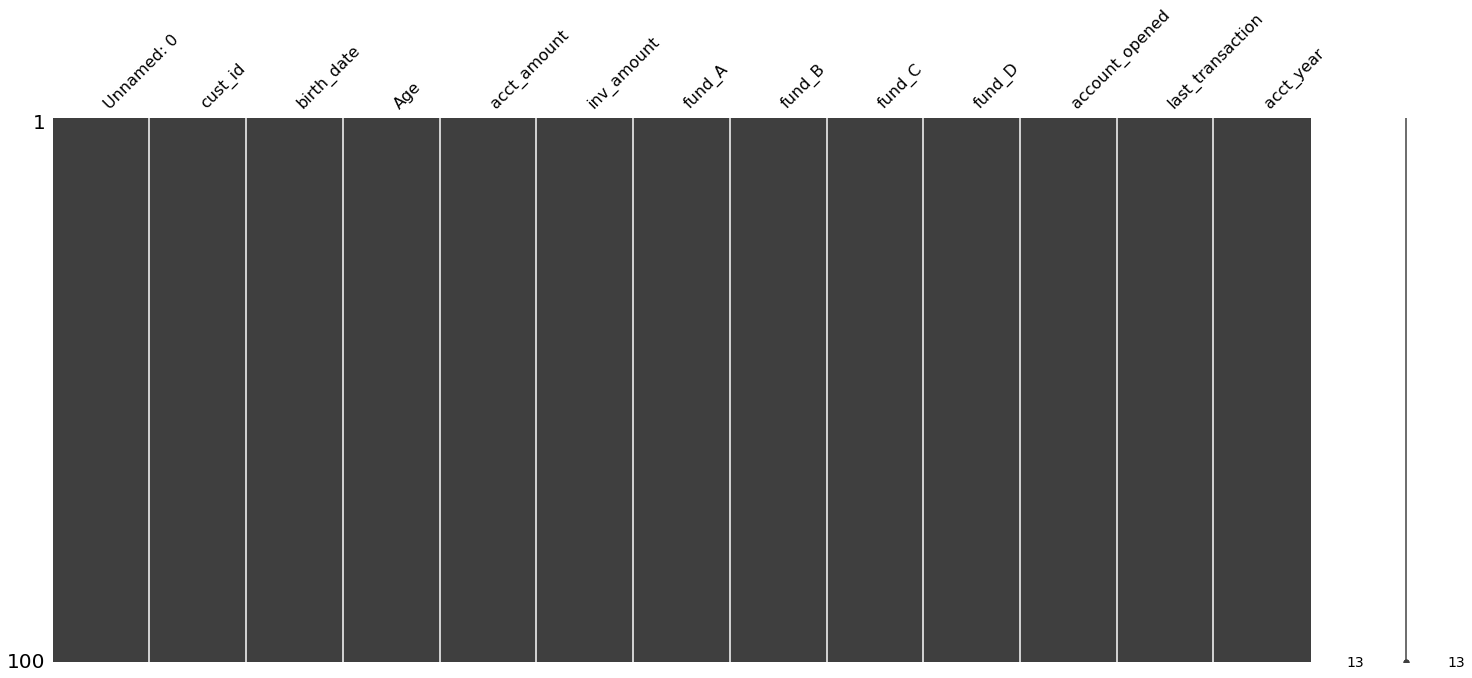

In [60]:
import missingno as msno
import matplotlib.pyplot as plt

# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

In [61]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

In [62]:
investors.describe()

,Unnamed: 0,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.00000,100.00000,100.00000
mean,49.500000,43.170000,3.027560e+06,46006.300000,11474.067600,11824.45330,11901.84080,10971.52570
std,29.011492,10.120541,2.104214e+07,26526.791616,12432.069917,11081.38577,14084.34211,9487.15002
min,0.000000,27.000000,1.220984e+04,3214.000000,41.000000,312.00000,67.00000,118.00000
25%,24.750000,34.000000,5.921813e+04,23524.250000,2317.000000,3387.50000,2272.25000,4044.75000
50%,49.500000,45.500000,8.334416e+04,45785.500000,6489.000000,8089.00000,6811.00000,8480.00000
75%,74.250000,51.000000,9.509747e+04,66595.750000,15585.000000,17678.25000,15426.75000,15754.00000
max,99.000000,63.000000,1.737431e+08,96614.000000,58179.000000,51281.00000,75499.00000,51708.00000


In [63]:
missing_investors.describe()

,Unnamed: 0,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Answer: The inv_amount is missing only for young customers, since the average age in missing_investors is 22 and the maximum age is 25.

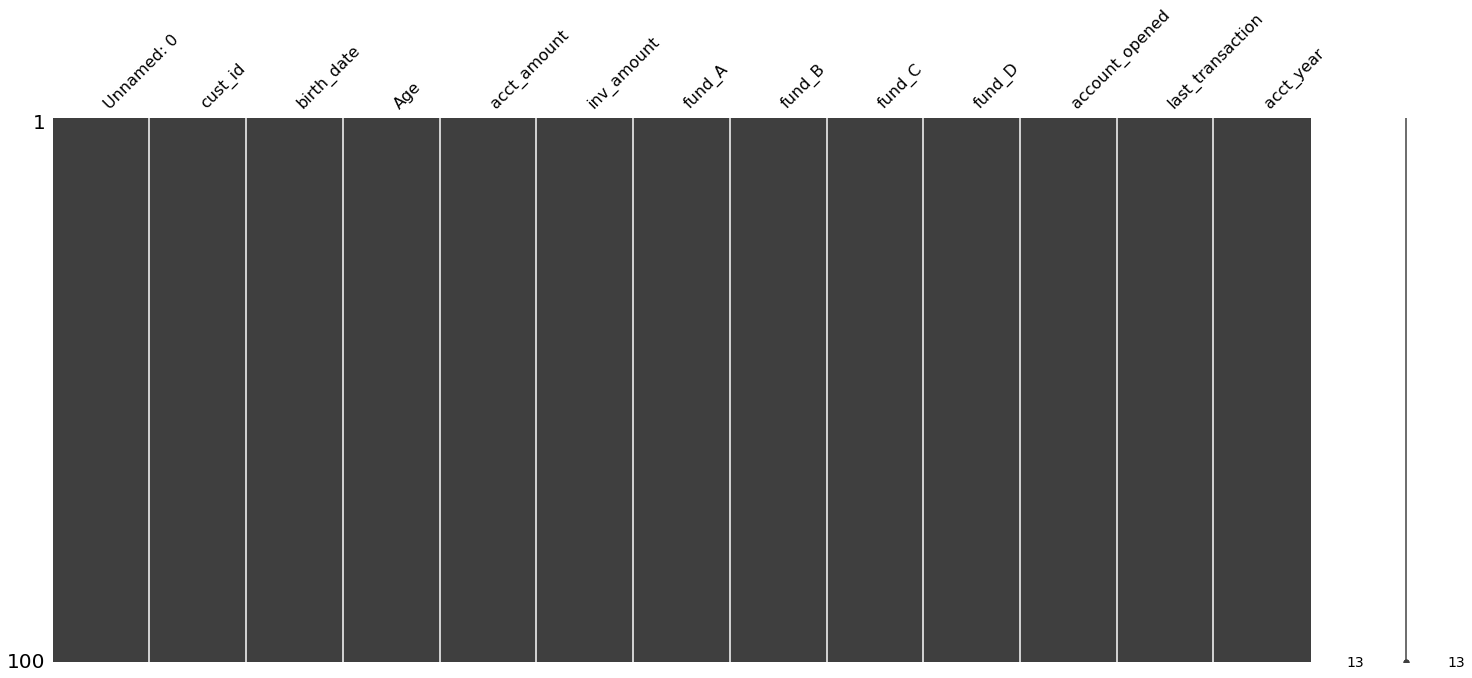

In [66]:
# Sort banking by age and visualize
banking_sorted = banking.sort_values(by="Age")
msno.matrix(banking_sorted)
plt.show()

In [68]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


## 4. Record linkage

Answer: 2 by substituting 'g' with 'n' and 'n' with 'g'.

In [69]:
restaurants = pd.read_csv('restaurants_L2_dirty.csv')
restaurants.head()

,Unnamed: 0,name,addr,city,phone,type
0,0,kokomo,6333 w. third st.,la,2139330773,american
1,1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,4,gumbo,6333 w. third st.,la,2139330358,cajun/creole


In [70]:
restaurants_new = pd.read_csv('restaurants_L2.csv')
restaurants_new.head()

,Unnamed: 0,name,addr,city,phone,type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,american


In [74]:
# Import process from thefuzz
from thefuzz import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants.type.unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('indonesian', 72), ('italian', 67), ('russian', 67), ('american', 62), ('californian', 54), ('japanese', 54), ('mexican/tex-mex', 54), ('american ( new )', 54), ('mexican', 50), ('cajun/creole', 36), ('middle eastern', 36), ('vietnamese', 36), ('pacific new wave', 36), ('fast food', 36), ('chicken', 33), ('hamburgers', 27), ('hot dogs', 26), ('coffeebar', 26), ('continental', 26), ('steakhouses', 25), ('southern/soul', 22), ('delis', 20), ('eclectic', 20), ('pizza', 20), ('health food', 19), ('diners', 18), ('coffee shops', 18), ('noodle shops', 18), ('french ( new )', 18), ('desserts', 18), ('seafood', 17), ('chinese', 17)]
[('american', 100), ('american ( new )', 90), ('mexican', 80), ('mexican/tex-mex', 68), ('asian', 62), ('italian', 53), ('russian', 53), ('middle eastern', 51), ('pacific new wave', 45), ('hamburgers', 44), ('indonesian', 44), ('chicken', 40), ('southern/soul', 39), ('japanese', 38), ('eclectic', 38), ('delis', 36), ('pizza', 36), ('cajun/creole',

Answer: 80

In [75]:
# Inspect the unique values of the cuisine_type column
print(restaurants.type.unique())

['american' 'californian' 'japanese' 'cajun/creole' 'hot dogs' 'diners'
 'delis' 'hamburgers' 'seafood' 'italian' 'coffee shops' 'russian'
 'steakhouses' 'mexican/tex-mex' 'noodle shops' 'mexican' 'middle eastern'
 'asian' 'vietnamese' 'health food' 'american ( new )' 'pacific new wave'
 'indonesian' 'eclectic' 'chicken' 'fast food' 'southern/soul' 'coffeebar'
 'continental' 'french ( new )' 'desserts' 'chinese' 'pizza']


In [76]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants.type, limit = restaurants.shape[0])

# Inspect the first 5 matches
print(matches[0:5])

[('italian', 100, 14), ('italian', 100, 21), ('italian', 100, 47), ('italian', 100, 57), ('italian', 100, 73)]


In [82]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['type'], limit=len(restaurants.type))

# Iterate through the list of matches to italian
for match in matches:
    # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
        # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
        restaurants['type'][match[2]] = 'italian'

C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_6496\2135482986.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants['type'][match[2]] = 'italian'


In [85]:
# Iterate through categories
for cuisine in ['italian', 'asian', 'american']:  
    # Create a list of matches, comparing cuisine with the cuisine_type column
    matches = process.extract(cuisine, restaurants['type'], limit=len(restaurants.type))
    
    # Iterate through the list of matches
    for match in matches:
        # Check whether the similarity score is greater than or equal to 80
        if match[1] >= 80:
            # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
            restaurants.loc[restaurants['type'] == match[0]] = cuisine

# Inspect the final result
print(restaurants['type'].unique())

['american' 'californian' 'japanese' 'cajun/creole' 'hot dogs' 'diners'
 'delis' 'hamburgers' 'seafood' 'italian' 'coffee shops' 'russian'
 'steakhouses' 'mexican/tex-mex' 'noodle shops' 'middle eastern' 'asian'
 'vietnamese' 'health food' 'pacific new wave' 'indonesian' 'eclectic'
 'chicken' 'fast food' 'southern/soul' 'coffeebar' 'continental'
 'french ( new )' 'desserts' 'chinese' 'pizza']


Answer:

Record linkage: Two customer DataFrames containing names and address, one with a unique identifier per customer, one without, Using an address column to join two DataFrames, with the address in each DataFrame being formatted slightly differently, Merging two basketball DataFrames, with columns team_A, team_b, time and differently formatted team names between each DataFrame.

Regular joins: Consolidating two DataFrames containing details on DataCamp courses, with each DataCamp course having its own unique identifier, Two basketball DataFrames with a common unique identifier per game.

In [91]:
import recordlinkage

# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

Answer: Compare between columns, score the comparison, then link the DataFrames.

In [94]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('type', 'type', label = 'cuisine_type')

# Find similar matches of rest_name
comp_cl.string('name', 'name', label='name', threshold = 0.8) 

<Compare>

In [98]:
# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
potential_matches

city  cuisine_type  name
0  0       0             1   0.0
   1       0             1   0.0
   2       0             1   0.0
   3       0             1   0.0
   4       0             1   0.0
...      ...           ...   ...
55 221     1             1   0.0
   230     1             1   0.0
   233     1             1   0.0
   238     1             1   0.0
   241     1             1   0.0

[4152 rows x 3 columns]

potential_matches[potential_matches.sum(axis = 1) >= n]

Answer: 3 because I need to have matches in all my columns.

Answer: matches.index.get_level_values(0)

In [97]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
full_restaurants

C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_6496\1109426136.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_restaurants = restaurants.append(non_dup)


,Unnamed: 0,name,addr,city,phone,type
0,american,american,american,american,american,american
1,american,american,american,american,american,american
2,2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,4,gumbo,6333 w. third st.,la,2139330358,cajun/creole
...,...,...,...,...,...,...
331,331,vivande porta via,2125 fillmore st.,san francisco,4153464430,italian
332,332,vivande ristorante,670 golden gate ave.,san francisco,4156739245,italian
333,333,world wrapps,2257 chestnut st.,san francisco,4155639727,american
334,334,wu kong,101 spear st.,san francisco,4159579300,asian
